In [1]:
# Notebook configuration
#HNSWLIB_RESULTS_DIR = "./results"
HNSWLIB_RESULTS_DIR = "/home/sho/GXL/results"
GT_DIR = "/mnt/nas1/fvs_benchmark_datasets"
GXL_DIR = "/mnt/nas1/GXL/deep1B/v2.0_with250Mfix"
GXL_APU8_DIR = '/mnt/nas1/GXL/deep1B/v2.0_with250Mfix_8apus_apu3'
GXL_APU15_DIR = '/home/sho/GXL/out_namibia_0201_1'

In [2]:
# Python imports

import os
import json
import re

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib widget
%matplotlib inline
#import ipywidgets as widgets

/tmp/ipykernel_2832149/1774252021.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Load CSV
vanilla_csvs = []
gxl_csvs = []
gxl_4_csvs = []
gxl_8_csvs = []
gxl_15_csvs = []

try:
    for file in os.listdir(HNSWLIB_RESULTS_DIR):
        print(file)
        if 'vanilla' in file:
            if file.endswith(".csv"):
                fpath = os.path.join(HNSWLIB_RESULTS_DIR, file)
                vanilla_csvs.append(fpath)
        elif 'gxl' in file and 'numactl' not in file:
            if file.endswith(".csv"):
                fpath = os.path.join(HNSWLIB_RESULTS_DIR, file)
                gxl_csvs.append(fpath)
        """elif 'numactl' in file:
            if file.endswith(".csv"):
                fpath = os.path.join(HNSWLIB_RESULTS_DIR, file)
                gxl_numactl_csvs.append(fpath)"""

    if len(vanilla_csvs)==0:
        raise Exception("No CSVs found in vanilla!")
    print("found %d CSV files for vanilla" % len(vanilla_csvs))
except:
    print("err")

# apu 4
for file in os.listdir(GXL_DIR):
    print(file)
    if file.endswith(".csv"):
        fpath = os.path.join(GXL_DIR, file)
        gxl_4_csvs.append(fpath)

# apu 8
for file in os.listdir(GXL_APU8_DIR):
    print(file)
    if file.endswith(".csv"):
        fpath = os.path.join(GXL_APU8_DIR, file)
        gxl_8_csvs.append(fpath)

# apu 15
for file in os.listdir(GXL_APU15_DIR):
    print(file)
    if file.endswith(".csv"):
        fpath = os.path.join(GXL_APU15_DIR, file)
        gxl_15_csvs.append(fpath)



           

if len(gxl_csvs)==0:
    raise Exception("No CSVs found in gxl!")
print("found %d CSV files for gxl" % len(gxl_csvs))
if len(gxl_4_csvs)==0:
    raise Exception("No CSVs found in gxl w/ 4 apu!")
print("found %d CSV files for gxl w/ 4 apu" % len(gxl_4_csvs))
if len(gxl_8_csvs)==0:
    raise Exception("No CSVs found in gxl w/ 8 apu!")
print("found %d CSV files for gxl w/ 8 apu" % len(gxl_8_csvs))
if len(gxl_15_csvs)==0:
    raise Exception("No CSVs found in gxl w/ 15 apu!")
print("found %d CSV files for gxl w/ 15 apu" % len(gxl_15_csvs))



vanilla_deep-100M_64_32.csv
vanilla_deep-10M_64_32.csv
gxl_load_deep1B_20m_ef_64_M_32_gxl_512.csv
gxl_load_deep1B_100m_ef_64_M_32_gxl_512.csv
vanilla_deep-250M_64_32.csv
gxl_load_deep1B_10m_ef_64_M_32_gxl_512.csv
gxl_load_deep1B_250m_ef_64_M_32_gxl_512.csv
1129
gxl_load_deep1B_1m_ef_64_M_32_gxl_512.csv
gxl_load_deep1B_1000m_ef_64_M_32_gxl_512.csv
gxl_load_deep1B_50m_ef_64_M_32_gxl_512.csv
vanilla_deep-1M_64_32.csv
vis
gxl_load_deep1B_500m_ef_64_M_32_gxl_512.csv
vanilla_deep-20M_64_32.csv
vanilla_deep-1000M_64_32.csv
vanilla_deep-50M_64_32.csv
vanilla_deep-500M_64_32.csv
old
found 8 CSV files for vanilla
deep1B_1m_ef_64_M_32_gxl.bin
deep1B_10m_ef_64_M_32_gxl.bin
deep1B_20m_ef_64_M_32_gxl.bin
deep1B_50m_ef_64_M_32_gxl.bin
deep1B_100m_ef_64_M_32_gxl.bin
deep1B_250m_ef_64_M_32_gxl.bin
deep-1M_1700158142.098489.csv
deep-10M_1700158355.068015.csv
deep-20M_1700158661.755577.csv
deep-50M_1700159398.912206.csv
deep-100M_1700160637.835966.csv
deep-250M_1700163449.826781.csv
deep1B_500m_ef_64_M_3

In [4]:
# Load to df
vanilla_dfs = []
gxl_dfs = []
gxl_4_dfs = []
gxl_8_dfs = []
gxl_15_dfs = []

for csv in vanilla_csvs:
    df = pd.read_csv(csv, delimiter='\t')
    vanilla_dfs.append(df)

for csv in gxl_csvs:
    df = pd.read_csv(csv, delimiter='\t')
    gxl_dfs.append(df)

for csv in gxl_4_csvs:
    df = pd.read_csv(csv, delimiter='\t')
    gxl_4_dfs.append(df)

for csv in gxl_8_csvs:
    df = pd.read_csv(csv, delimiter='\t')
    gxl_8_dfs.append(df)

for csv in gxl_15_csvs:
    df = pd.read_csv(csv, delimiter='\t')
    gxl_15_dfs.append(df)


# concat into one master
print("Concatenating into one master dataframe...")
vanilla_df = pd.concat( vanilla_dfs )
gxl_df = pd.concat( gxl_dfs )
gxl_4_df = pd.concat( gxl_4_dfs )
gxl_8_df = pd.concat( gxl_8_dfs )
gxl_15_df = pd.concat( gxl_15_dfs )
print("There are %d rows" % vanilla_df.shape[0])
print("There are %d rows" % gxl_df.shape[0])
print("There are %d rows" % gxl_4_df.shape[0])
print("There are %d rows" % gxl_8_df.shape[0])
print("There are %d rows" % gxl_15_df.shape[0])



Concatenating into one master dataframe...
There are 35271 rows
There are 32008 rows
There are 40 rows
There are 40 rows
There are 40 rows


# RAM Usage

In [5]:
lst = []
for i in df[df.operation == 'mem'].memory:
    l = i[1:-1].split(',')[0]
    rss = int(l)/1000000000
    lst.append(rss)

plt.plot(lst)
plt.ylabel('GB')
plt.xlabel('time')
plt.title('mem usage - deep 1000M')
    

AttributeError: 'DataFrame' object has no attribute 'memory'

In [ ]:
v_df = vanilla_df[vanilla_df['operation'] == 'mem']
v_df['rss'] = v_df['memory'].apply(lambda x:int(x[1:-1].split(',')[0])/1000000000)
v_df = v_df[['dataset', 'numrecs', 'rss']]
v_df.head()

: 

In [ ]:
g_pivot = pd.pivot_table(data=g_df, index=['numrecs'], columns=['subop'], values='walltime')
g_pivot

: 

In [ ]:
v_df.groupby('dataset')['rss'].plot(legend=True)
plt.ylabel('GB')
plt.xlabel('time')
plt.title('Memory Usage On Index Built - Deep1B')

: 

: 

: 

## GT

In [7]:
def size_num(s):
    '''get raw numercs of text abbrev'''
    if s == '1M': return 1000000
    elif s == '2M': return 2000000
    elif s == '5M': return 5000000
    elif s == '10M': return 10000000
    elif s == '20M': return 20000000
    elif s == '50M': return 50000000
    elif s == '100M': return 100000000
    elif s == '200M': return 200000000
    elif s == '250M': return 250000000
    elif s == '500M': return 500000000
    elif s == '10K': return 10000
    elif s == '1000M': return 1000000000
    else: raise Exception("Unsupported size " + s)
    
def hsize(numrecs):
    '''get text abbrev of raw numrecs'''
    if numrecs==10000: return "10K"
    elif numrecs==1000000: return "1M"
    elif numrecs==2000000: return "2M"
    elif numrecs==5000000: return "5M"
    elif numrecs==10000000: return "10M"
    elif numrecs==20000000: return "20M"
    elif numrecs==50000000: return "50M"
    elif numrecs==100000000: return "100M"
    elif numrecs==250000000: return "250M"
    elif numrecs==500000000: return "500M"
    elif numrecs==1000000000: return "1000M"
    else: raise Exception("Unsupported size" + str(numrecs))
    
def compute_recall(a, b):
    '''Computes the recall metric on query results.'''

    nq, rank = a.shape
    intersect = [ np.intersect1d(a[i, :rank], b[i, :rank]).size for i in range(nq) ]
    ninter = sum( intersect )
    return ninter / a.size, intersect

In [ ]:
dic = {}
recall10_mean = []
latency_mean = []
numrecs_lst = []
ef_search_lst = []

for numrecs in vanilla_df['numrecs'].unique():
    if numrecs == -1:
        continue
    
    ef_unique = vanilla_df.ef_search.unique().tolist()
    ef_unique.remove(-1)

    num_records = hsize(numrecs)
    gt_file = os.path.join(GT_DIR, "deep-%s-gt-1000.npy" % num_records)
    gt = np.load(gt_file, allow_pickle=True)

    for ef_search in ef_unique:
        recall_lst = []
        latency_lst = []
        
        df = vanilla_df[(vanilla_df['ef_search']== ef_search) & (vanilla_df['numrecs'] == numrecs)]
        if len(df) != 1000:
            raise Exception("not equal to 1000")

        for j in range(len(df)):
            row = df.iloc[j]
            lbl = row.labels
            latency = row.walltime

            # transform lbl
            lbl_trunc = lbl[2:-2]
            lbl_converted = np.fromstring( lbl_trunc, dtype=int, sep=' ')
            lbl_reshape = lbl_converted.reshape(1, 10)
            gt_reshape = gt[j][:10].reshape(1, 10)

            # compute recall
            recall, cnt = compute_recall(gt_reshape, lbl_reshape)
            recall_lst.append(recall)
            latency_lst.append(latency)

           
        recall10_mean.append(np.mean(recall_lst))
        latency_mean.append(np.mean(latency_lst))
        numrecs_lst.append(num_records)
        ef_search_lst.append(ef_search)
        print(num_records, ef_search, len(recall_lst), np.mean(recall_lst), np.mean(latency_lst))
dic = {'numrecs':numrecs_lst, 'ef_search':ef_search_lst, 'recall@10':recall10_mean, 'latency':latency_mean} 
vanilla_result_df = pd.DataFrame(dic)
        


: 

In [ ]:
dic = {}
recall10_mean = []
latency_mean = []
numrecs_lst = []
ef_search_lst = []

for numrecs in gxl_df['numrecs'].unique():
    ef_unique = gxl_df.ef_search.unique().tolist()
    ef_unique.remove(-1)

    num_records = hsize(numrecs)
    gt_file = os.path.join(GT_DIR, "deep-%s-gt-1000.npy" % num_records)
    gt = np.load(gt_file, allow_pickle=True)

    for ef_search in ef_unique:
        recall_lst = []
        latency_lst = []
        
        df = gxl_df[(gxl_df['ef_search']== ef_search) & (gxl_df['numrecs'] == numrecs)]
        if len(df) != 1000:
            raise Exception("not equal to 1000")

        for j in range(len(df)):
            row = df.iloc[j]
            lbl = row.labels
            latency = row.walltime

            # transform lbl
            lbl_trunc = lbl[2:-2]
            lbl_converted = np.fromstring( lbl_trunc, dtype=int, sep=' ')
            lbl_reshape = lbl_converted.reshape(1, 10)
            gt_reshape = gt[j][:10].reshape(1, 10)

            # compute recall
            recall, cnt = compute_recall(gt_reshape, lbl_reshape)
            recall_lst.append(recall)
            latency_lst.append(latency)

           
        recall10_mean.append(np.mean(recall_lst))
        latency_mean.append(np.mean(latency_lst))
        numrecs_lst.append(num_records)
        ef_search_lst.append(ef_search)
        print(num_records, ef_search, len(recall_lst), np.mean(recall_lst), np.mean(latency_lst))
dic = {'numrecs':numrecs_lst, 'ef_search':ef_search_lst, 'recall@10':recall10_mean, 'latency':latency_mean} 
gxl_result_df = pd.DataFrame(dic)
        


: 

In [ ]:
"""dic = {}
recall10_mean = []
latency_mean = []
numrecs_lst = []
ef_search_lst = []

for numrecs in gxl_numactl_df['numrecs'].unique():
    ef_unique = gxl_numactl_df.ef_search.unique().tolist()
    ef_unique.remove(-1)

    num_records = hsize(numrecs)
    gt_file = os.path.join(GT_DIR, "deep-%s-gt-1000.npy" % num_records)
    gt = np.load(gt_file, allow_pickle=True)

    for ef_search in ef_unique:
        recall_lst = []
        latency_lst = []
        
        df = gxl_numactl_df[(gxl_numactl_df['ef_search']== ef_search) & (gxl_numactl_df['numrecs'] == numrecs)]
        if len(df) != 1000:
            raise Exception("not equal to 1000")

        for j in range(len(df)):
            row = df.iloc[j]
            lbl = row.labels
            latency = row.walltime

            # transform lbl
            lbl_trunc = lbl[2:-2]
            lbl_converted = np.fromstring( lbl_trunc, dtype=int, sep=' ')
            lbl_reshape = lbl_converted.reshape(1, 10)
            gt_reshape = gt[j][:10].reshape(1, 10)

            # compute recall
            recall, cnt = compute_recall(gt_reshape, lbl_reshape)
            recall_lst.append(recall)
            latency_lst.append(latency)

           
        recall10_mean.append(np.mean(recall_lst))
        latency_mean.append(np.mean(latency_lst))
        numrecs_lst.append(num_records)
        ef_search_lst.append(ef_search)
        print(num_records, ef_search, len(recall_lst), np.mean(recall_lst), np.mean(latency_lst))
dic = {'numrecs':numrecs_lst, 'ef_search':ef_search_lst, 'recall@10':recall10_mean, 'latency':latency_mean} 
gxl_numactl_result_df = pd.DataFrame(dic)
        
"""

: 

In [ ]:
# p90/95/99 latency, show not just mean, capture in a csv
# error bar along y axis, range, interval, stats interval, boxplots intervals, coretile analysis for recall

: 

In [ ]:
def plot_paretto(num_records):

    df_vanilla = vanilla_result_df[ vanilla_result_df['numrecs'] == num_records]
    print(df_vanilla )
    df_gxl = gxl_result_df[ gxl_result_df['numrecs'] == num_records]
    print(df_gxl )
    #df_gxl_numactl = gxl_numactl_result_df[ gxl_numactl_result_df['numrecs'] == num_records]
    #print(df_gxl_numactl)

    # extract the lines for plotting
    paretto_vanilla_parameters = list(df_vanilla ['ef_search'])
    paretto_vanilla_search = list(df_vanilla ['latency'])
    paretto_vanilla_recall = list(df_vanilla ['recall@10'])
    print(paretto_vanilla_search, paretto_vanilla_recall)

    paretto_gxl_parameters = list(df_gxl ['ef_search'])
    paretto_gxl_search = list(df_gxl ['latency'])
    paretto_gxl_recall = list(df_gxl ['recall@10'])
    print(paretto_gxl_search, paretto_gxl_recall)

    """paretto_gxl_numactl_parameters = list(df_gxl_numactl ['ef_search'])
    paretto_gxl_numactl_search = list(df_gxl_numactl ['latency'])
    paretto_gxl_numactl_recall = list(df_gxl_numactl ['recall@10'])
    print(paretto_gxl_numactl_search, paretto_gxl_numactl_recall)"""

    # plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(paretto_vanilla_search, paretto_vanilla_recall, marker='x', color='blue', label='vanilla HNSW')
    ax.plot(paretto_gxl_search, paretto_gxl_recall, marker='x', color='orange', label='gxl HNSW')
    #ax.plot(paretto_gxl_numactl_search, paretto_gxl_numactl_recall, marker='x', color='green', label='gxl with numactl HNSW')

    # annotate hnsw
    for i, bits in enumerate(paretto_vanilla_parameters):
        ax.annotate("ef=%d"%bits, 
                xy=(paretto_vanilla_search[i],paretto_vanilla_recall[i]-0.005 ), 
                xytext=(0.0,7),
                textcoords="offset points"
                )
    for i, bits in enumerate(paretto_gxl_parameters):
        ax.annotate("ef=%d"%bits, 
                xy=(paretto_gxl_search[i],paretto_gxl_recall[i]-0.005 ), 
                xytext=(0.0,7),
                textcoords="offset points"
                )
    
    """ for i, bits in enumerate(paretto_gxl_numactl_parameters):
        ax.annotate("ef=%d"%bits, 
                xy=(paretto_gxl_numactl_search[i],paretto_gxl_numactl_recall[i]-0.005 ), 
                xytext=(0.0,7),
                textcoords="offset points"
                )"""

    ax.set_xlabel("Q-by-Q Latency (milliseconds)")
    ax.set_ylabel("Recall@10")
    title = f"HNSWLIB Vanilla vs. GXL - {num_records} Records of Deep1B"
    plt.title(title)
    ax.legend(loc='lower right', fontsize='small')

    save_path = f'results/vis/vanilla_gxl_paretto{num_records}.png'

    fig.savefig(save_path)

    return "done"
    

: 

In [ ]:
lst = ['1M', '10M', '20M', '50M', '100M', '250M', '500M', '1000M']
for i in lst:
    plot_paretto(i)

: 

: 

# plot search time

In [ ]:
"""# plot one line of latest, matching label with the og notebook 
# Plot import/train times

# compute average wall import time via groupby
avg_search_walltime = \
    vanilla_df[vanilla_df['operation'] == 'search'].groupby( [ 'numrecs' ] ) ['walltime'].mean()

# get the plot points for import time
xs = []
ys = []
for idx in avg_search_walltime.index:
    x = idx
    xs.append(x)
    #y = avg_search_wall_import_time[idx]/(1000*60.0*60.0) # milliseconds
    y = avg_search_walltime[idx] # milliseconds
    ys.append(y)
print("vanilla search time", xs, ys)

# plot the lines and label the plot
fig, ax = plt.subplots()

#
# only show the wall time lines
#
ax.plot(xs, ys, marker='x', label='vanilla')
ax.set_ylabel('milliseconds')
ax.set_xlabel('num records')
ax.set_xticks(xs)

# don't show all xticks near the start since they bunch up
ax.set_xticklabels(['1M', '', '20M', '50M', '100M', '250M', '500M'], rotation = 45)

#
# annotate last data point in lines of interest
latest_hours = "%.1f" % ys[-1]
ax.annotate(latest_hours, xy=(xs[-1],ys[-1]), xytext=(0.0,-30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )

ax.set_title("HNSWLIB Vanilla Search Time - Subsets of Deep-1B - apu12")
ax.legend(loc='best')
fig.tight_layout()
fig.savefig("results/vis/vanilla_hnswlib_walltime.png")"""

: 

In [ ]:
"""# plot one line of latest, matching label with the og notebook 
# Plot import/train times

# compute average wall import time via groupby
avg_search_wall_time = \
    gxl_df[gxl_df['operation'] == 'search'].groupby( [ 'numrecs' ] ) ['walltime'].mean()

# get the plot points for import time
xs = []
ys = []
for idx in avg_search_wall_time.index:
    x = idx
    xs.append(x)
    y = avg_search_wall_time[idx]/(1000*60.0*60.0)
    ys.append(y)
print("gxl search time", xs, ys)

# plot the lines and label the plot
fig, ax = plt.subplots()

#
# only show the wall time lines
#
ax.plot(xs, ys, marker='x', label='vanilla')
ax.set_ylabel('hours')
ax.set_xlabel('num records')
ax.set_xticks(xs)

# don't show all xticks near the start since they bunch up
ax.set_xticklabels(['1M', '', '20M', '50M', '100M', '250M', '500M'], rotation = 45)

#
# annotate last data point in lines of interest
latest_hours = "%.1f" % ys[-1]
ax.annotate(latest_hours, xy=(xs[-1],ys[-1]), xytext=(0.0,-30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )

ax.set_title("HNSWLIB GXL Search Time - Subsets of Deep-1B - apu12")
ax.legend(loc='best')
fig.tight_layout()
fig.savefig("results/vis/gxl_hnswlib_search_walltime.png")"""

: 

# plot build/load time

In [ ]:
"""# plot one line of latest, matching label with the og notebook 
# Plot import/train times

# compute average wall import time via groupby
avg_wall_import_time = \
    vanilla_df[vanilla_df['operation'] == 'build'].groupby( [ 'numrecs' ] ) ['walltime'].mean()

# get the plot points for import time
xs = []
ys = []
for idx in avg_wall_import_time.index:
    x = idx
    xs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    ys.append(y)
print("vanilla search time", xs, ys)

# plot the lines and label the plot
fig, ax = plt.subplots()

#
# only show the wall time lines
#
ax.plot(xs, ys, marker='x', label='vanilla')
ax.set_ylabel('hours')
ax.set_xlabel('num records')
ax.set_xticks(xs)

# don't show all xticks near the start since they bunch up
ax.set_xticklabels(['1M', '', '20M', '50M', '100M', '250M', '500M'], rotation = 45)

#
# annotate last data point in lines of interest
latest_hours = "%.1f" % ys[-1]
ax.annotate(latest_hours, xy=(xs[-1],ys[-1]), xytext=(0.0,-30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )

ax.set_title("HNSWLIB Vanilla Build Index Time - Subsets of Deep-1B - apu12")
ax.legend(loc='best')
fig.tight_layout()
fig.savefig("results/vis/vanilla_hnswlib_walltime_build.png")"""

: 

In [ ]:
"""# Plot walltime

# compute average search walltime via groupby
avg_search_wall_time = \
    gxl_df[gxl_df['operation'] == 'load'].groupby( [ 'numrecs' ] ) ['walltime'].mean()

# get the plot points for import time
xs = []
ys = []
for idx in avg_search_walltime.index:
    x = idx
    xs.append(x)
    y = avg_search_walltime[idx] # milliseconds
    ys.append(y)
print("vanilla search time", xs, ys)

# plot the lines and label the plot
fig, ax = plt.subplots()

#
# only show the wall time lines
#
ax.plot(xs, ys, marker='x', label='vanilla')
ax.set_ylabel('milliseconds')
ax.set_xlabel('num records')
ax.set_xticks(xs)

# don't show all xticks near the start since they bunch up
ax.set_xticklabels(['1M', '', '20M', '50M', '100M', '250M', '500M'], rotation = 45)

ax.set_title("HNSWLIB GXL Load Time - Subsets of Deep-1B - apu12")
ax.legend(loc='best')
fig.tight_layout()
fig.savefig("results/vis/gxl_load_walltime.png")"""

: 

# Import GXL Index Build Time

In [8]:
g_4_df = gxl_4_df[['operation', 'subop', 'walltime', 'dataset']] # seconds
g_4_df = g_4_df[g_4_df['operation'] == 'build-index']
g_4_df['numrecs'] = g_4_df['dataset'].apply(lambda x: size_num(x[5:]))

g_8_df = gxl_8_df[['operation', 'subop', 'walltime', 'dataset']] # seconds
g_8_df = g_8_df[g_8_df['operation'] == 'build-index']
g_8_df['numrecs'] = g_8_df['dataset'].apply(lambda x: size_num(x[5:]))

g_15_df = gxl_15_df[['operation', 'subop', 'walltime', 'dataset']] # seconds
g_15_df = g_15_df[g_15_df['operation'] == 'build-index']
g_15_df['numrecs'] = g_15_df['dataset'].apply(lambda x: size_num(x[5:]))

v_df = vanilla_df[['operation', 'walltime', 'dataset', 'numrecs']] # seconds
v_df = v_df[v_df['operation'] == 'build']
v_df

,operation,walltime,dataset,numrecs
165,build,1647.981940,deep-100M,100000000
10,build,98.772178,deep-10M,10000000
443,build,4441.586893,deep-250M,250000000
1,build,7.455661,deep-1M,1000000
22,build,213.450697,deep-20M,20000000
1590,build,15978.641510,deep-1000M,1000000000
77,build,766.100065,deep-50M,50000000
947,build,9505.774945,deep-500M,500000000


In [9]:
g_4_pivot = pd.pivot_table(data=g_4_df, index=['numrecs'], columns=['subop'], values='walltime')
g_8_pivot = pd.pivot_table(data=g_8_df, index=['numrecs'], columns=['subop'], values='walltime')
g_15_pivot = pd.pivot_table(data=g_15_df, index=['numrecs'], columns=['subop'], values='walltime')
g_15_pivot

subop,cen_gen,index_gen,knn_gen,knn_symmetric
numrecs,,,,
1000000,5.431979,0.863446,20.095747,0.773337
10000000,38.191952,9.339888,50.078132,8.491839
20000000,49.435972,18.959292,87.834236,23.109151
50000000,110.672917,48.906684,187.268954,56.342656
100000000,148.903635,103.661090,373.803260,123.621628
250000000,242.750590,265.307212,942.870821,269.984330
500000000,602.467674,594.251517,1747.111356,556.181794
1000000000,826.921587,1238.057903,3714.700829,1187.842283


In [10]:
g_8_pivot['vanilla'] = v_df.sort_values(['numrecs'])['walltime'].tolist()
g_8_pivot


subop,cen_gen,index_gen,knn_gen,knn_symmetric,vanilla
numrecs,,,,,
1000000,5.297143,0.891214,15.217803,0.742396,7.455661
10000000,30.657558,8.712012,50.893886,9.838719,98.772178
20000000,59.583047,18.068238,90.240671,21.893816,213.450697
50000000,140.690370,50.419851,213.078564,62.713428,766.100065
100000000,233.563325,99.682349,410.075228,120.497190,1647.981940
250000000,457.853268,263.492696,1001.125809,308.079423,4441.586893
500000000,729.980966,677.910094,2043.945431,572.246576,9505.774945
1000000000,769.586948,1668.483854,4119.150709,1242.667412,15978.641510


In [11]:
g_4_pivot['total'] = g_4_pivot.iloc[:, :4].sum(axis=1)
g_8_pivot['total'] = g_8_pivot.iloc[:, :4].sum(axis=1)
g_15_pivot['total'] = g_15_pivot.iloc[:, :4].sum(axis=1)

In [ ]:
g_15_pivot

: 

: 

# gxl 4 vs 8 apu vs vanilla

Rectangle(xy=(0.1, 0), width=0.2, height=1213.09, angle=0)
Rectangle(xy=(1.1, 0), width=0.2, height=2777.81, angle=0)
Rectangle(xy=(2.1, 0), width=0.2, height=5595.28, angle=0)
Rectangle(xy=(3.1, 0), width=0.2, height=12988, angle=0)
Rectangle(xy=(0.3, 0), width=0.2, height=863.818, angle=0)
Rectangle(xy=(1.3, 0), width=0.2, height=2030.55, angle=0)
Rectangle(xy=(2.3, 0), width=0.2, height=4024.08, angle=0)
Rectangle(xy=(3.3, 0), width=0.2, height=7799.89, angle=0)
Rectangle(xy=(0.5, 0), width=0.2, height=749.99, angle=0)
Rectangle(xy=(1.5, 0), width=0.2, height=1720.91, angle=0)
Rectangle(xy=(2.5, 0), width=0.2, height=3500.01, angle=0)
Rectangle(xy=(3.5, 0), width=0.2, height=6967.52, angle=0)


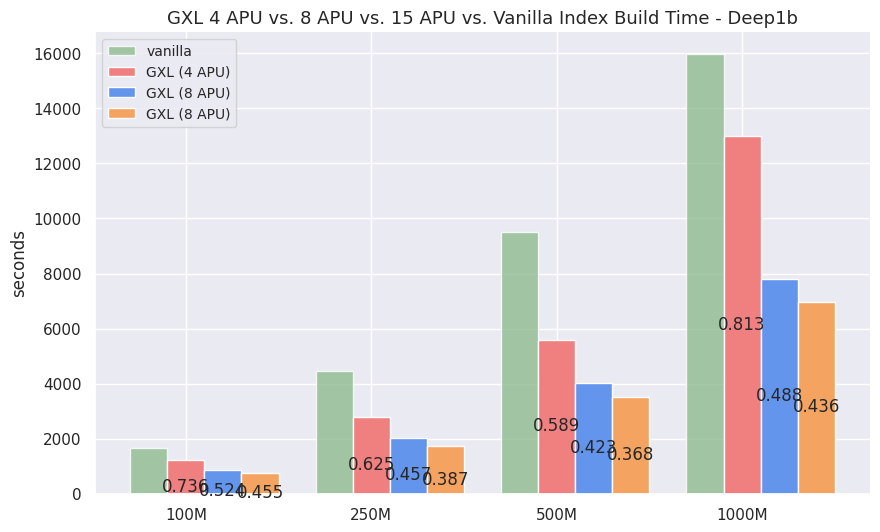

In [12]:
# 8 apu vs 4 apu vs vanilla

import seaborn as sns

# data
# gxl - 4 apu
gxl_4 = np.array(g_4_pivot.total.tolist()[4:])

# gxl - 8 apu
gxl_8 = np.array(g_8_pivot.total.tolist()[4:])

# gxl - 15 apu
gxl_15 = np.array(g_15_pivot.total.tolist()[4:])

# vanilla
vanilla_time = np.array(g_8_pivot.vanilla.tolist()[4:])

# data sizes
sizes = ['100M', '250M', '500M', '1000M']

with sns.axes_style("white"):
    sns.set_style("ticks")
    sns.set_context("talk")
    sns.set(rc={'figure.figsize':(10, 6)})

    # plot details
    bar_width = 0.2
    epsilon = 0.015
    line_width = 1
    opacity = 0.7
    """v_pos = np.arange(len(gxl_4))
    gxl_pos = v_pos + bar_width
    gxl_8_pos = gxl_pos + bar_width"""

    """gxl_pos = np.arange(len(gxl_4))
    v_pos = gxl_pos - bar_width
    gxl_8_pos = gxl_pos + bar_width"""

    v_pos = np.arange(len(gxl_4))
    gxl_pos = v_pos + bar_width
    gxl_8_pos = gxl_pos + bar_width
    gxl_15_pos = gxl_8_pos + bar_width

    fig, ax = plt.subplots()

    # vanilla bar
    bar_vanilla = plt.bar(v_pos, vanilla_time, bar_width, color='darkseagreen', label='vanilla', alpha=0.8)

    # gxl stacked bar - 4 apu
    bar_gxl_4 = plt.bar(gxl_pos, gxl_4, bar_width, color='lightcoral', label='GXL (4 APU)')

    # gxl stacked bar - 8 apu
    bar_gxl_8 = plt.bar(gxl_8_pos, gxl_8, bar_width, color='cornflowerblue', label='GXL (8 APU)')

    # gxl stacked bar - 15 apu
    bar_gxl_15 = plt.bar(gxl_15_pos, gxl_15, bar_width, color='sandybrown', label='GXL (8 APU)')
    

    for i in range(len(ax.patches)):
        # 04812
        # 15913
        # 261014
        # 371115
        # 0
        if i in [4, 8, 12]:
            og = ax.patches[0]
            patch = ax.patches[i]
            lbl = round(patch.get_height()/og.get_height(), 3)
            print(patch)
            ax.text(patch.get_x() + patch.get_width()/2, patch.get_height()/2, f'{lbl}', 
            verticalalignment='top', horizontalalignment='center')

        # 1
        if i in [5, 9, 13]:
            og = ax.patches[1]
            patch = ax.patches[i]
            lbl = round(patch.get_height()/og.get_height(), 3)
            print(patch)
            ax.text(patch.get_x() + patch.get_width()/2, patch.get_height()/2, f'{lbl}', 
            verticalalignment='top', horizontalalignment='center')

        # 2
        if i in [6, 10, 14]:
            og = ax.patches[2]
            patch = ax.patches[i]
            lbl = round(patch.get_height()/og.get_height(), 3)
            print(patch)
            ax.text(patch.get_x() + patch.get_width()/2, patch.get_height()/2, f'{lbl}', 
            verticalalignment='top', horizontalalignment='center')

        # 3
        if i in [7, 11, 15]:
            og = ax.patches[3]
            patch = ax.patches[i]
            lbl = round(patch.get_height()/og.get_height(), 3)
            print(patch)
            ax.text(patch.get_x() + patch.get_width()/2, patch.get_height()/2, f'{lbl}', 
            verticalalignment='top', horizontalalignment='center')


    plt.xticks(gxl_pos, sizes)
    plt.ylabel('seconds')
    plt.legend(loc='upper left', fontsize=10)
    sns.despine()

    plt.title('GXL 4 APU vs. 8 APU vs. 15 APU vs. Vanilla Index Build Time - Deep1b', fontsize=13)

    plt.savefig('results/vis/gxl_4vs8__vanilla_index_build_time_total.png', bbox_inches="tight")
    plt.show()



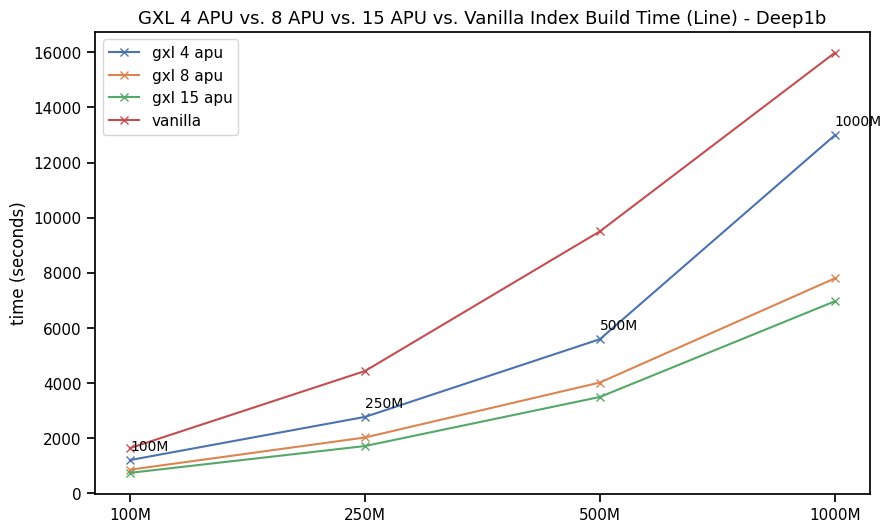

In [16]:
# data
# gxl - 4 apu
gxl_4 = np.array(g_4_pivot.total.tolist()[4:])

# gxl - 8 apu
gxl_8 = np.array(g_8_pivot.total.tolist()[4:])

# gxl - 15 apu
gxl_15 = np.array(g_15_pivot.total.tolist()[4:])

# vanilla
vanilla_time = np.array(g_8_pivot.vanilla.tolist()[4:])

# data sizes
sizes = ['100M', '250M', '500M', '1000M']

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(gxl_4, marker='x', label='gxl 4 apu')
ax.plot(gxl_8, marker='x', label='gxl 8 apu')
ax.plot(gxl_15, marker='x', label='gxl 15 apu')
ax.plot(vanilla_time, marker='x', label='vanilla')

for i, s in enumerate(sizes):
    ax.annotate(s, 
        xy=(i, gxl_4[i]-0.005), 
        xytext=(0.0,7),
        textcoords="offset points", 
        fontsize=10
        )


plt.legend()
plt.xticks(np.arange(4), sizes)
plt.ylabel('time (seconds)')
plt.title('GXL 4 APU vs. 8 APU vs. 15 APU vs. Vanilla Index Build Time (Line) - Deep1b', fontsize=13)
plt.savefig('results/vis/gxl_4vs8__vanilla_index_build_time_line.png', bbox_inches="tight")
plt.show()
plt.close()

In [ ]:
# 8 apu vs 4 apu

import seaborn as sns

# data
# gxl - 4 apu
gxl_cen_gen = np.array(g_4_pivot.cen_gen.tolist()[4:])
gxl_index_gen = np.array(g_4_pivot.index_gen.tolist()[4:])
gxl_knn_gen = np.array(g_4_pivot.knn_gen.tolist()[4:])
gxl_knn_sym = np.array(g_4_pivot.knn_symmetric.tolist()[4:])

# gxl - 8 apu
gxl_cen_gen_8 = np.array(g_8_pivot.cen_gen.tolist()[4:])
gxl_index_gen_8 = np.array(g_8_pivot.index_gen.tolist()[4:])
gxl_knn_gen_8 = np.array(g_8_pivot.knn_gen.tolist()[4:])
gxl_knn_sym_8 = np.array(g_8_pivot.knn_symmetric.tolist()[4:])

# gxl - 15 apu
gxl_cen_gen_15 = np.array(g_15_pivot.cen_gen.tolist()[4:])
gxl_index_gen_15 = np.array(g_15_pivot.index_gen.tolist()[4:])
gxl_knn_gen_15 = np.array(g_15_pivot.knn_gen.tolist()[4:])
gxl_knn_sym_15 = np.array(g_15_pivot.knn_symmetric.tolist()[4:])

# vanilla
vanilla_time = np.array(g_8_pivot.vanilla.tolist()[4:])

# data sizes
sizes = ['100M', '250M', '500M', '1000M']

with sns.axes_style("white"):
    sns.set_style("ticks")
    sns.set_context("talk")
    sns.set(rc={'figure.figsize':(10, 6)})

    # plot details
    bar_width = 0.2
    epsilon = 0.015
    line_width = 1
    opacity = 0.7
    v_pos = np.arange(len(gxl_cen_gen))
    gxl_pos = v_pos + bar_width
    gxl_8_pos = gxl_pos + bar_width
    gxl_15_pos = gxl_8_pos + bar_width

    # vanilla bar
    bar_vanilla = plt.bar(v_pos, vanilla_time, bar_width, color='darkseagreen', label='vanilla', alpha=0.8)

    # gxl stacked bar - 4 apu
    stacked_gxl_cen_gen = plt.bar(gxl_pos, gxl_cen_gen, bar_width, color='lightcoral', label='cen gen (4 APU)')

    stacked_gxl_knn_gen = plt.bar(gxl_pos, gxl_knn_gen, bar_width-epsilon, 
                            bottom=gxl_cen_gen, alpha=opacity, color='white', edgecolor='lightcoral',
                            linewidth=line_width, hatch='//', label='knn gen (4 APU)')

    stacked_gxl_knn_sym = plt.bar(gxl_pos, gxl_knn_sym, bar_width-epsilon, 
                            bottom=gxl_knn_gen+gxl_cen_gen, alpha=opacity, color='white', edgecolor='lightcoral',
                            linewidth=line_width, hatch='0', label='knn sym (4 APU)')

    stacked_gxl_idx_gen = plt.bar(gxl_pos, gxl_index_gen, bar_width-epsilon, 
                            bottom=gxl_knn_sym+gxl_knn_gen+gxl_cen_gen, alpha=opacity, color='white', edgecolor='lightcoral',
                            linewidth=line_width, hatch='x', label='index gen (4 APU)')

    # gxl stacked bar - 8 apu
    stacked_gxl_cen_gen_8 = plt.bar(gxl_8_pos, gxl_cen_gen_8, bar_width, color='cornflowerblue', label='cen gen (8 APU)')

    stacked_gxl_knn_gen_8 = plt.bar(gxl_8_pos, gxl_knn_gen_8, bar_width-epsilon, 
                            bottom=gxl_cen_gen_8, alpha=opacity, color='white', edgecolor='cornflowerblue',
                            linewidth=line_width, hatch='//', label='knn gen (8 APU)')

    stacked_gxl_knn_sym_8 = plt.bar(gxl_8_pos, gxl_knn_sym_8, bar_width-epsilon, 
                            bottom=gxl_knn_gen_8+gxl_cen_gen_8, alpha=opacity, color='white', edgecolor='cornflowerblue',
                            linewidth=line_width, hatch='0', label='knn sym (8 APU)')

    stacked_gxl_idx_gen_8 = plt.bar(gxl_8_pos, gxl_index_gen_8, bar_width-epsilon, 
                            bottom=gxl_knn_sym_8+gxl_knn_gen_8+gxl_cen_gen_8, alpha=opacity, color='white', edgecolor='cornflowerblue',
                            linewidth=line_width, hatch='x', label='index gen (8 APU)')

    # gxl stacked bar - 15 apu
    stacked_gxl_cen_gen_15 = plt.bar(gxl_15_pos, gxl_cen_gen_15, bar_width, color='sandybrown', label='cen gen (15 APU)')

    stacked_gxl_knn_gen_15 = plt.bar(gxl_15_pos, gxl_knn_gen_15, bar_width-epsilon, 
                            bottom=gxl_cen_gen_15, alpha=opacity, color='white', edgecolor='sandybrown',
                            linewidth=line_width, hatch='//', label='knn gen (15 APU)')

    stacked_gxl_knn_sym_15 = plt.bar(gxl_15_pos, gxl_knn_sym_15, bar_width-epsilon, 
                            bottom=gxl_knn_gen_15+gxl_cen_gen_15, alpha=opacity, color='white', edgecolor='sandybrown',
                            linewidth=line_width, hatch='0', label='knn sym (15 APU)')

    stacked_gxl_idx_gen_15 = plt.bar(gxl_15_pos, gxl_index_gen_15, bar_width-epsilon, 
                            bottom=gxl_knn_sym_15+gxl_knn_gen_15+gxl_cen_gen_15, alpha=opacity, color='white', edgecolor='sandybrown',
                            linewidth=line_width, hatch='x', label='index gen (15 APU)')

    

    plt.xticks((gxl_8_pos+gxl_pos)/2, sizes)
    plt.ylabel('seconds')
    plt.legend(loc='best', fontsize=10)
    sns.despine()

    plt.title('GXL 4 APU vs. 8 APU vs. 15 APU vs. Vanilla Index Build Time (Stages) - Deep1b', fontsize=13)

    plt.savefig('results/vis/gxl_4vs8__vanilla_index_build_time_stages.png', bbox_inches="tight")
    plt.show()



: 

: 

: 

: 

: 